In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# set style and in line plotting
%matplotlib inline
plt.style.use("seaborn")

In [3]:
#load ted talks data from directory
ted = pd.read_csv("../datasets/ted.csv")

In [4]:
#number of rows and columns of ted data
ted.shape

(2550, 17)

In [5]:
#examined first five rows of data
ted.head()
ted.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721


## Q1. Which talk provoke the most online discussion ?
#### -  To answer this, we'll use the number of comments or views as a proxy for the most talked about ted talk

In [6]:
#examine views and comments columns of data frame once again
most_discussed=ted.loc[:,["title","views", "comments"]]


In [7]:
# 10 most viewed talk show
most_discussed.sort_values("views",ascending=False).head(10)

,title,views,comments
0,Do schools kill creativity?,47227110,4553
1346,Your body language may shape who you are,43155405,2290
677,How great leaders inspire action,34309432,1930
837,The power of vulnerability,31168150,1927
452,10 things you didn't know about orgasm,22270883,354
1776,How to speak so that people want to listen,21594632,297
201,My stroke of insight,21190883,2877
5,Why we do what we do,20685401,672
2114,This is what happens when you reply to spam email,20475972,150
1416,"Looks aren't everything. Believe me, I'm a model.",19787465,846


In [8]:
#talk show with the most online comments
most_discussed.sort_values("comments", ascending=False).head(10)

,title,views,comments
96,Militant atheism,4374792,6404
0,Do schools kill creativity?,47227110,4553
644,Science can answer moral questions,3433437,3356
201,My stroke of insight,21190883,2877
1787,How do you explain consciousness?,2162764,2673
954,Taking imagination seriously,1832930,2492
840,On reading the Koran,1847256,2374
1346,Your body language may shape who you are,43155405,2290
661,The danger of science denial,1838628,2272
677,How great leaders inspire action,34309432,1930


In [9]:
#create a new column for the number of comments made per views
most_discussed["views_per_comment"]= most_discussed.views/most_discussed.comments

In [10]:
#sort by comments_per_view in ascending order
most_discussed.sort_values("views_per_comment", inplace=True)
most_discussed.head(10) # first 10 most talked about ted talks

,title,views,comments,views_per_comment
744,The case for same-sex marriage,292395,649,450.531587
803,E-voting without fraud,543551,834,651.739808
96,Militant atheism,4374792,6404,683.134291
694,Inside a school for suicide bombers,1057238,1502,703.886818
954,Taking imagination seriously,1832930,2492,735.525682
840,On reading the Koran,1847256,2374,778.119629
876,Curating humanity's heritage,439180,555,791.315315
1787,How do you explain consciousness?,2162764,2673,809.114852
661,The danger of science denial,1838628,2272,809.255282
561,Dance to change the world,481834,595,809.805042


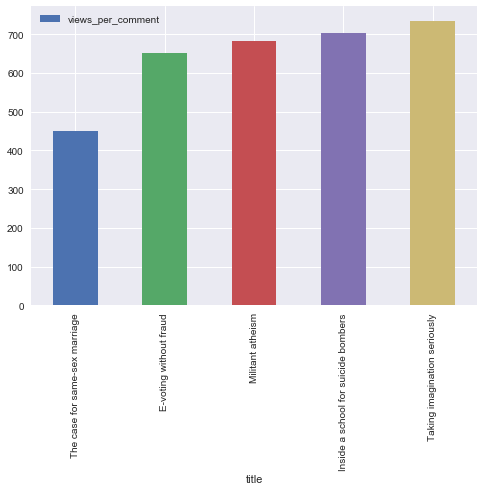

In [11]:
#bar graph of the most talked about
most_discussed.set_index("title").head().plot(y = "views_per_comment",kind="bar")

### The most talked about ted talk was "The case for same-sex marriage" which was commented for every 450 views

# The number of talks that took place each year

In [12]:
#creates new dataframe with event and film_date columns
ted_events = ted.loc[:,["title","event","film_date"]]
ted_events.head()

,title,event,film_date
0,Do schools kill creativity?,TED2006,1140825600
1,Averting the climate crisis,TED2006,1140825600
2,Simplicity sells,TED2006,1140739200
3,Greening the ghetto,TED2006,1140912000
4,The best stats you've ever seen,TED2006,1140566400


In [13]:
#convert the unix date time column to normal date
ted_events["datetime"]= pd.to_datetime(ted_events.film_date,unit="s")
ted_events.head()

,title,event,film_date,datetime
0,Do schools kill creativity?,TED2006,1140825600,2006-02-25
1,Averting the climate crisis,TED2006,1140825600,2006-02-25
2,Simplicity sells,TED2006,1140739200,2006-02-24
3,Greening the ghetto,TED2006,1140912000,2006-02-26
4,The best stats you've ever seen,TED2006,1140566400,2006-02-22


In [14]:
#create a column for the year the event was held
ted_events["year"]= ted_events.datetime.dt.year
ted_events.head()

,title,event,film_date,datetime,year
0,Do schools kill creativity?,TED2006,1140825600,2006-02-25,2006
1,Averting the climate crisis,TED2006,1140825600,2006-02-25,2006
2,Simplicity sells,TED2006,1140739200,2006-02-24,2006
3,Greening the ghetto,TED2006,1140912000,2006-02-26,2006
4,The best stats you've ever seen,TED2006,1140566400,2006-02-22,2006


In [15]:
#count the number of values for year columns. 
ted_events.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: year, dtype: int64

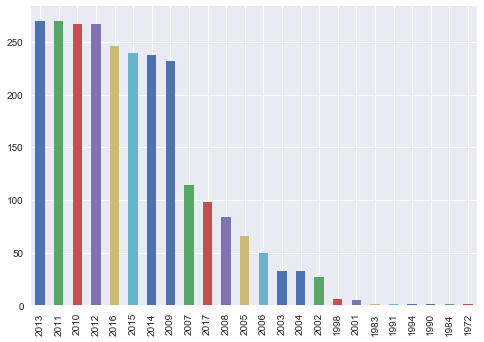

In [16]:
#visualize using a bar plot. NB: values are already sorted
ted_events.year.value_counts().plot(kind="bar")

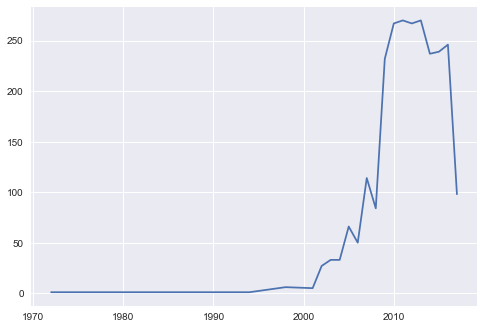

In [17]:
#sort by index(year) and plot a line graph
ted_events.year.value_counts().sort_index().plot()

## What were the best events in TED history to attend?

In [18]:
ted_events.event.value_counts().head()

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [19]:
#insert column for views into the ted_events dataframe
ted_events["views"]= ted.views

In [20]:
ted_events.groupby("event").views.agg(["count","mean"]).sort_values("mean",ascending=False).head()

,count,mean
event,,
TEDxPuget Sound,1,34309432.0
TEDxHouston,2,16140250.5
TEDxBloomington,2,9484259.5
TEDxCreativeCoast,1,8444981.0
TEDxNorrkoping,1,6569493.0


In [21]:
ted_events.groupby("event").views.agg(["count","mean","sum"]).sort_values("sum",ascending=False).head()

,count,mean,sum
event,,,
TED2013,77,2.302700e+06,177307937
TED2014,84,2.072874e+06,174121423
TEDGlobal 2013,66,2.584163e+06,170554736
TED2015,75,2.011017e+06,150826305
TED2006,45,3.274345e+06,147345533


### Unpack the ratings data

In [22]:
ted_ratings = ted.loc[:,["title","ratings","views","comments","speaker_occupation"]]
ted_ratings.head()

,title,ratings,views,comments,speaker_occupation
0,Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,4553,Author/educator
1,Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,265,Climate advocate
2,Simplicity sells,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,124,Technology columnist
3,Greening the ghetto,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,200,Activist for environmental justice
4,The best stats you've ever seen,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,593,Global health expert; data visionary


In [23]:
import ast
ast.literal_eval("[1,2,3]")

[1, 2, 3]

In [24]:
ted_ratings["ratings_list"]= ted_ratings.ratings.apply(ast.literal_eval)
ted_ratings.head()

,title,ratings,views,comments,speaker_occupation,ratings_list
0,Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,4553,Author/educator,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,265,Climate advocate,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,Simplicity sells,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,124,Technology columnist,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,Greening the ghetto,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,200,Activist for environmental justice,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,The best stats you've ever seen,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,593,Global health expert; data visionary,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."


In [25]:
ted_ratings.dtypes

title                 object
ratings               object
views                  int64
comments               int64
speaker_occupation    object
ratings_list          object
dtype: object

### Count the total number of ratings received by each talk
- new column named "num_ratings"

In [26]:
def get_num_ratings(list_of_dicts):
    num=0
    for d in list_of_dicts:
        num=num + d["count"]
    return num


In [27]:
get_num_ratings(ted_ratings.ratings_list[0])

93850

In [28]:
ted_ratings["num_ratings"]=ted_ratings.ratings_list.apply(get_num_ratings)

In [29]:
ted_ratings.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

In [30]:
#alternatively
#pd.DataFrame(ted_ratings.ratings_list[0])["count"].sum()

### Which occupations deliver the funniest TED talks on average?

In [31]:
ted_ratings.head()

,title,ratings,views,comments,speaker_occupation,ratings_list,num_ratings
0,Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,4553,Author/educator,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",93850
1,Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,265,Climate advocate,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936
2,Simplicity sells,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,124,Technology columnist,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",2824
3,Greening the ghetto,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,200,Activist for environmental justice,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",3728
4,The best stats you've ever seen,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,593,Global health expert; data visionary,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620


In [32]:
ted_ratings.ratings_list[2]

[{'id': 7, 'name': 'Funny', 'count': 964},
 {'id': 3, 'name': 'Courageous', 'count': 45},
 {'id': 9, 'name': 'Ingenious', 'count': 183},
 {'id': 1, 'name': 'Beautiful', 'count': 60},
 {'id': 21, 'name': 'Unconvincing', 'count': 104},
 {'id': 11, 'name': 'Longwinded', 'count': 78},
 {'id': 8, 'name': 'Informative', 'count': 395},
 {'id': 10, 'name': 'Inspiring', 'count': 230},
 {'id': 22, 'name': 'Fascinating', 'count': 166},
 {'id': 2, 'name': 'Confusing', 'count': 27},
 {'id': 25, 'name': 'OK', 'count': 146},
 {'id': 24, 'name': 'Persuasive', 'count': 230},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 54},
 {'id': 26, 'name': 'Obnoxious', 'count': 142}]

In [33]:
ted_ratings.ratings.str.contains("Funny").value_counts()

True    2550
Name: ratings, dtype: int64

In [34]:
# function to iterate through dictionary and get funny
def get_funny_ratings(list_of_dicts):
    funny_ratings=0
    for d in list_of_dicts:
        if d["name"]=="Funny":
            funny_ratings+=d["count"]
    return funny_ratings
        

In [35]:
ted_ratings["funny_ratings"]=ted_ratings.ratings_list.apply(get_funny_ratings)

In [36]:
ted_ratings.head()

,title,ratings,views,comments,speaker_occupation,ratings_list,num_ratings,funny_ratings
0,Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,4553,Author/educator,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",93850,19645
1,Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,265,Climate advocate,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936,544
2,Simplicity sells,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,124,Technology columnist,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",2824,964
3,Greening the ghetto,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,200,Activist for environmental justice,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",3728,59
4,The best stats you've ever seen,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,593,Global health expert; data visionary,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620,1390


In [37]:
ted_ratings["funny_rate"]= ted_ratings.funny_ratings/ted_ratings.num_ratings 

In [38]:
ted_ratings.sort_values("funny_rate", ascending=False)[["funny_rate","speaker_occupation"]]

,funny_rate,speaker_occupation
685,0.702076,"Actor, comedian, playwright"
1398,0.669927,Comedian
747,0.630677,Comedian
173,0.629662,Investor
2114,0.625182,Comedian and writer
2273,0.578989,Comedian and writer
194,0.566828,Jugglers
21,0.542022,"Humorist, web artist"
675,0.527406,Data scientist
568,0.525407,Comedian


### Analyze the funny rate by occupation


In [39]:
ted_ratings.groupby("speaker_occupation").funny_rate.mean().sort_values(ascending=False).head()

speaker_occupation
Comedian and writer            0.602085
Jugglers                       0.566828
Actor, comedian, playwright    0.558107
Actor, writer                  0.515152
Comedian                       0.512457
Name: funny_rate, dtype: float64

### Focus on occupations that are well-represented in the data

In [40]:
occupation_counts= ted_ratings.speaker_occupation.value_counts()

In [41]:
top_occupations= occupation_counts[occupation_counts>=5].index

In [42]:
ted_top_occupations=ted_ratings[ted_ratings.speaker_occupation.isin(top_occupations)]

In [43]:
ted_top_occupations.shape

(786, 9)

In [44]:
ted_top_occupations.groupby("speaker_occupation").funny_rate.mean().sort_values(ascending = False)

speaker_occupation
Comedian                                      0.512457
Performance poet, multimedia artist           0.306468
Singer/songwriter                             0.252205
Producer                                      0.202531
Data scientist                                0.184076
Cartoonist                                    0.162120
Techno-illusionist                            0.152171
Graphic designer                              0.135718
Poet                                          0.107398
Global health expert; data visionary          0.090306
Artist                                        0.078939
Author                                        0.075508
Entrepreneur                                  0.073295
Novelist                                      0.070876
Evolutionary biologist                        0.069157
Reporter                                      0.066250
Game designer                                 0.062317
Writer                                        

In [45]:
%history

#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set style and in line plotting
%matplotlib inline
plt.style.use("seaborn")
#load ted talks data from directory
ted = pd.read_csv("../datasets/ted.csv")
#number of rows and columns of ted data
ted.shape
#examined first five rows of data
ted.head()
ted.tail()
#examine views and comments columns of data frame once again
most_discussed=ted.loc[:,["title","views", "comments"]]
# 10 most viewed talk show
most_discussed.sort_values("views",ascending=False).head(10)
#talk show with the most online comments
most_discussed.sort_values("comments", ascending=False).head(10)
#create a new column for the number of comments made per views
most_discussed["views_per_comment"]= most_discussed.views/most_discussed.comments
#sort by comments_per_view in ascending order
most_discussed.sort_values("views_per_comment", inplace=True)
most_discussed.head(10) # first 10 most talked about ted talks
#bar graph of th